# FIAP IA para Dev
## Tech Challenge Fase 01 - Análise e Processamento


Dataset disponível em https://www.kaggle.com/datasets/ankushpanday1/lung-cancer-risk-and-trends-across-25-countries/data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.preprocessing import LabelEncoder

In [9]:
pd.set_option("display.max_columns", None)
df = pd.read_csv("/content/sample_data/lung_cancer_prediction_dataset.csv")

df.head()

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Cancer_Stage,Survival_Years,Adenocarcinoma_Type,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,No,NaN,0,Yes,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,No,NaN,0,Yes,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,No,NaN,0,Yes,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,No,NaN,0,Yes,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,No,NaN,0,Yes,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


In [10]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           220632 non-null  int64  
 1   Country                      220632 non-null  object 
 2   Population_Size              220632 non-null  int64  
 3   Age                          220632 non-null  int64  
 4   Gender                       220632 non-null  object 
 5   Smoker                       220632 non-null  object 
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  object 
 9   Family_History               220632 non-null  object 
 10  Lung_Cancer_Diagnosis        220632 non-null  object 
 11  Cancer_Stage                 8961 non-null    object 
 12  Survival_Years               220632 n

In [11]:
print("Dataset Description:")
display(df.describe())

Dataset Description:


,ID,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
count,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000
mean,110315.500000,229.779882,52.518352,8.175274,7.007515,0.223526,63931.086928,1.502085,3.049802
std,63691.116633,349.247477,19.078215,12.377248,9.802187,1.231025,130690.126777,0.578043,14.924169
min,0.000000,54.000000,20.000000,0.000000,0.000000,0.000000,10005.000000,0.500000,0.000000
25%,55157.750000,83.000000,36.000000,0.000000,0.000000,0.000000,23000.000000,1.000000,0.000000
50%,110315.500000,113.000000,53.000000,0.000000,0.000000,0.000000,30000.000000,1.500000,0.000000
75%,165473.250000,206.000000,69.000000,15.000000,14.000000,0.000000,45000.000000,2.000000,0.000000
max,220631.000000,1400.000000,85.000000,40.000000,30.000000,10.000000,690000.000000,2.500000,90.000000


In [12]:
null_count = df.isnull().sum()
print(f"Null Values Count: {null_count}")

Null Values Count: ID                                  0
Country                             0
Population_Size                     0
Age                                 0
Gender                              0
Smoker                              0
Years_of_Smoking                    0
Cigarettes_per_Day                  0
Passive_Smoker                      0
Family_History                      0
Lung_Cancer_Diagnosis               0
Cancer_Stage                   211671
Survival_Years                      0
Adenocarcinoma_Type                 0
Air_Pollution_Exposure              0
Occupational_Exposure               0
Indoor_Pollution                    0
Healthcare_Access                   0
Early_Detection                     0
Treatment_Type                 213968
Developed_or_Developing             0
Annual_Lung_Cancer_Deaths           0
Lung_Cancer_Prevalence_Rate         0
Mortality_Rate                      0
dtype: int64


### Colunas Importantes
- Lung_Cancer_Diagnosis

### Colunas Desnecessárias
- ID

### Colunas Nulas
- Cancer_Stage
- Treatment_Type

### Colunas Catégoricas

### Colunas Númericas

In [13]:
display(set(df['Lung_Cancer_Diagnosis']))

{'No', 'Yes'}

([<matplotlib.patches.Wedge at 0x7977bcdfb0d0>,
 [Text(-1.091057728190039, 0.1399751183489092, 'No'),
  Text(1.0910577737996638, -0.13997476283716873, 'Yes')],
 [Text(-0.5951223971945667, 0.07635006455395045, '95.9%'),
  Text(0.5951224220725438, -0.07634987063845565, '4.1%')])

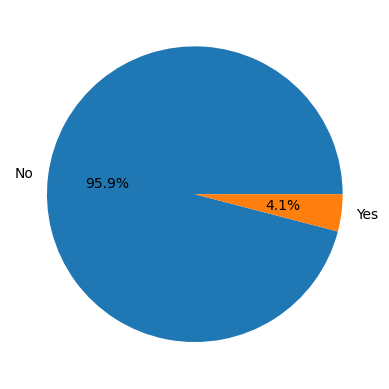

In [15]:
# Pessoas diagnosticadas com câncer de pulmão
plt.pie(df['Lung_Cancer_Diagnosis'].value_counts(), labels=df['Lung_Cancer_Diagnosis'].unique(), autopct='%1.1f%%')

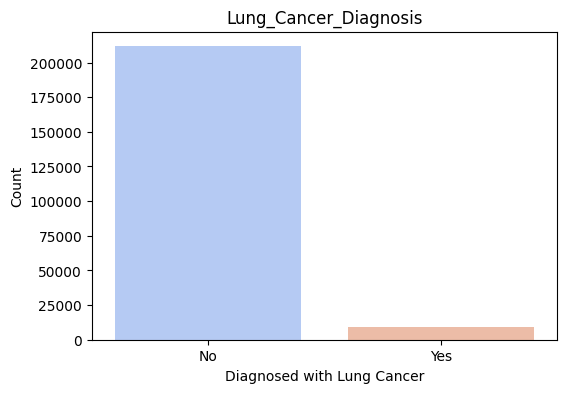

In [17]:
plt.figure(figsize=(6, 4))
sb.countplot(x="Lung_Cancer_Diagnosis", data=df, palette="coolwarm", hue="Lung_Cancer_Diagnosis")
plt.title("Lung_Cancer_Diagnosis")
plt.xlabel("Diagnosed with Lung Cancer")
plt.ylabel("Count")
plt.show()

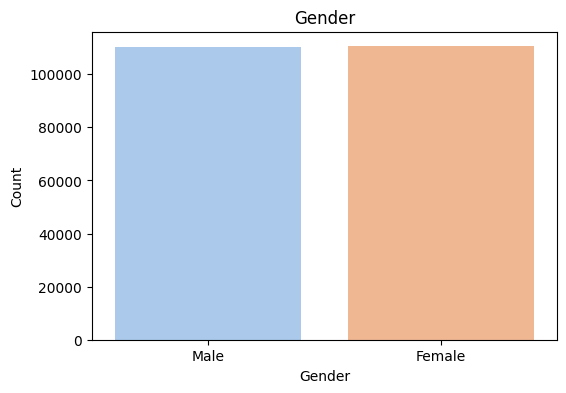

In [18]:
plt.figure(figsize=(6, 4))
sb.countplot(x="Gender", data=df, palette="pastel", hue="Gender")
plt.title("Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

([<matplotlib.patches.Wedge at 0x7977af60ac90>,
 [Text(-0.3386046374527683, 1.0465882186875024, 'Yes'),
  Text(0.33860510323750037, -1.0465880679911852, 'No')],
 [Text(-0.18469343861060086, 0.570866301102274, '60.0%'),
  Text(0.1846936926750002, -0.5708662189042828, '40.0%')])

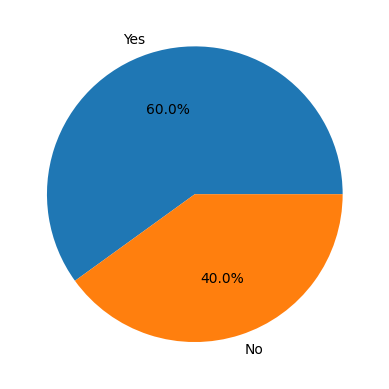

In [19]:
# Pessoas fumantes
plt.pie(df['Smoker'].value_counts(), labels=df['Smoker'].unique(), autopct='%1.1f%%')

<Axes: xlabel='Age', ylabel='Count'>

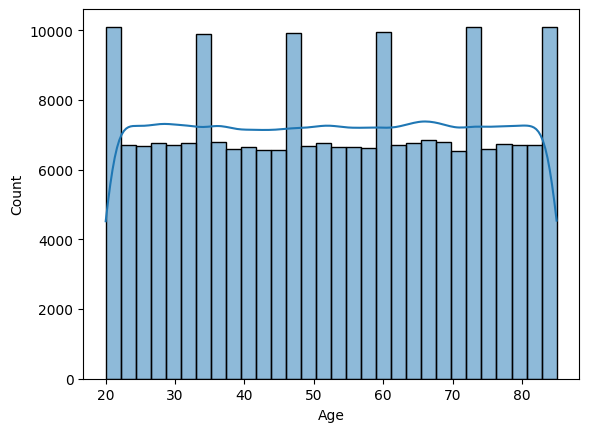

In [20]:
sb.histplot(data=df, x="Age", bins=30, kde=True)

<Axes: xlabel='Smoker', ylabel='count'>

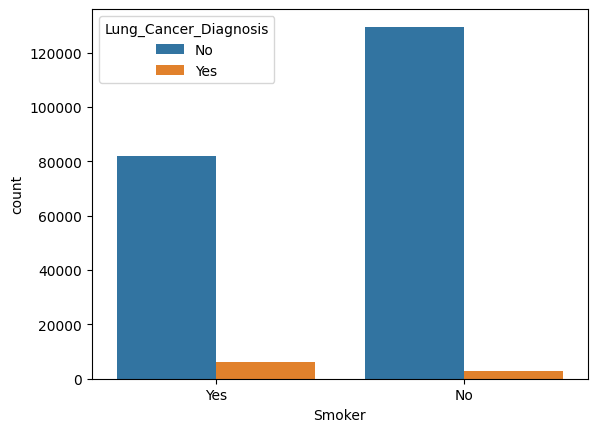

In [21]:
sb.countplot(x='Smoker', hue='Lung_Cancer_Diagnosis', data=df)

<Axes: xlabel='Gender', ylabel='count'>

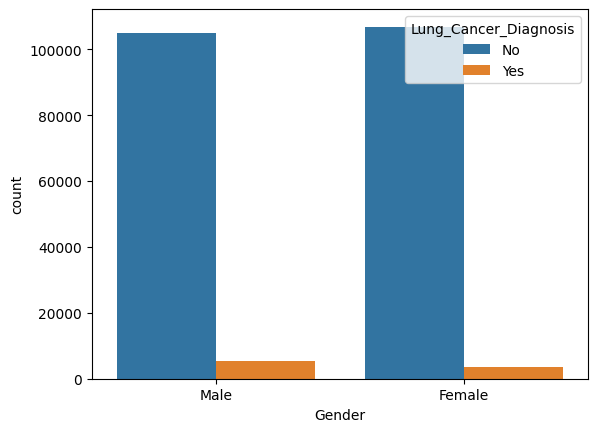

In [22]:
sb.countplot(x='Gender', hue='Lung_Cancer_Diagnosis', data=df)

<Axes: >

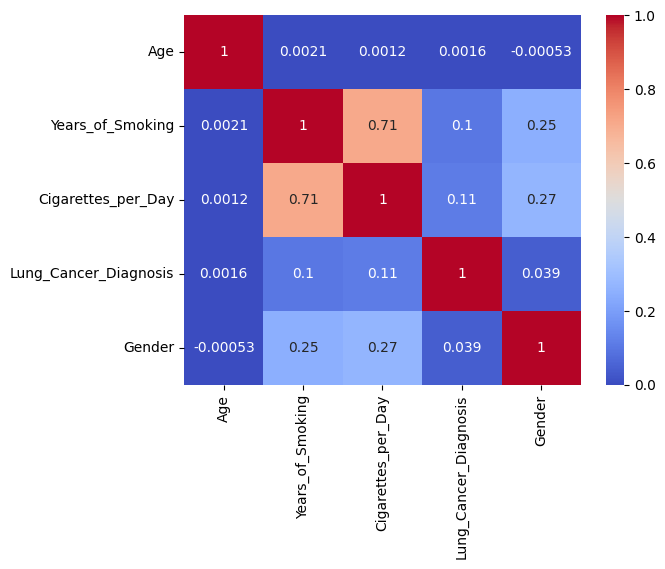

In [23]:
from sklearn.preprocessing import LabelEncoder

df['Lung_Cancer_Diagnosis'] = LabelEncoder().fit_transform(df['Lung_Cancer_Diagnosis'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

corr_matrix = df[['Age', 'Years_of_Smoking', 'Cigarettes_per_Day', 'Lung_Cancer_Diagnosis', 'Gender']].corr()
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')